<h1><span style="color: #8b0000;">Salary Prediction Project </span> </h1>

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
# Importing main data 
df=pd.read_csv('C:/Users/DELL/Desktop/Salary Prediction/Salary Prediction/ML case Study.csv',header=0)

# Importing College data 
colleges=pd.read_csv('C:/Users/DELL/Desktop/Salary Prediction/Salary Prediction/Colleges.csv',header=0)

# Importing Cities Data
cities=pd.read_csv('C:/Users/DELL/Desktop/Salary Prediction/Salary Prediction/cities.csv',header=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


In [4]:
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


## Tidying The Data

<h3><span style="color: #ff4500;">Converting Colleges and Cities to list </span> </h3>

In [5]:
# College and citie's data each column into list
Tier1 = colleges["Tier 1"].tolist()
Tier2 = colleges["Tier 2"].tolist()
Tier3 = colleges["Tier 3"].tolist()
metro = cities["Metrio City"].tolist()
non_metro = cities["non-metro cities"].tolist()

In [6]:
### Converting categorical college and city column into numerical 

# FOR COLLEGE COLUMN
for item in df.College:
    if item in Tier1:
        df["College"].replace(item,1,inplace =True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace = True)
    elif item in Tier3:
        df["College"].replace(item,3,inplace =True)

# FOR CITIES COLUMN
for item in df.City:
    if item in metro:
        df["City"].replace(item,1, inplace =True)
    elif item in non_metro:
        df["City"].replace(item,0, inplace = True)

### ---------------------------------------------------------------

<h3><span style="color: #ff4500;">Checking data set and analysing if any further pre-processing required </span> </h3>

In [7]:
df.head(6)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10
5,2,0,Executive,54340.0,4,73,31,59950.89


<h3><span style="color: #ff4500;">Creating dummies data</span> </h3>

In [8]:
df=pd.get_dummies(df,columns=['Role','College'],drop_first=True).astype(int)

In [9]:
df.head(6)

,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager,College_2,College_3
0,0,55523,3,66,19,71406,1,1,0
1,0,57081,1,84,18,68005,0,1,0
2,0,60347,2,52,28,76764,0,0,1
3,0,49010,2,81,33,82092,0,0,1
4,0,57879,4,74,32,73878,0,0,0
5,0,54340,4,73,31,59950,0,1,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   City                 1589 non-null   int32
 1   Previous CTC         1589 non-null   int32
 2   Previous job change  1589 non-null   int32
 3   Graduation Marks     1589 non-null   int32
 4   EXP (Month)          1589 non-null   int32
 5   CTC                  1589 non-null   int32
 6   Role_Manager         1589 non-null   int32
 7   College_2            1589 non-null   int32
 8   College_3            1589 non-null   int32
dtypes: int32(9)
memory usage: 56.0 KB



<h3><span style="color: #ff4500;">Final data</span> </h3>

In [11]:
df.head(6)

,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager,College_2,College_3
0,0,55523,3,66,19,71406,1,1,0
1,0,57081,1,84,18,68005,0,1,0
2,0,60347,2,52,28,76764,0,0,1
3,0,49010,2,81,33,82092,0,0,1
4,0,57879,4,74,32,73878,0,0,0
5,0,54340,4,73,31,59950,0,1,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   City                 1589 non-null   int32
 1   Previous CTC         1589 non-null   int32
 2   Previous job change  1589 non-null   int32
 3   Graduation Marks     1589 non-null   int32
 4   EXP (Month)          1589 non-null   int32
 5   CTC                  1589 non-null   int32
 6   Role_Manager         1589 non-null   int32
 7   College_2            1589 non-null   int32
 8   College_3            1589 non-null   int32
dtypes: int32(9)
memory usage: 56.0 KB


<h2><span style="color: #00ced1;"> Checking if data has multicollinearity</span> </h2>

### Correleation between variables

In [13]:
df.corr()

,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager,College_2,College_3
City,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671,0.022917,-0.024288
Previous CTC,0.004644,1.000000,0.005756,-0.032976,0.119163,0.257998,0.012321,-0.010947,0.042438
Previous job change,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150,0.004271,-0.050794
Graduation Marks,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005449,0.017858,-0.018419,0.012021
EXP (Month),-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301117,-0.026751,-0.014558,0.017427
CTC,-0.020365,0.257998,0.011370,-0.005449,0.301117,1.000000,0.621310,0.012347,-0.032150
Role_Manager,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621310,1.000000,-0.004865,-0.010706
College_2,0.022917,-0.010947,0.004271,-0.018419,-0.014558,0.012347,-0.004865,1.000000,-0.465741
College_3,-0.024288,0.042438,-0.050794,0.012021,0.017427,-0.032150,-0.010706,-0.465741,1.000000


### 1. Heat map plotting

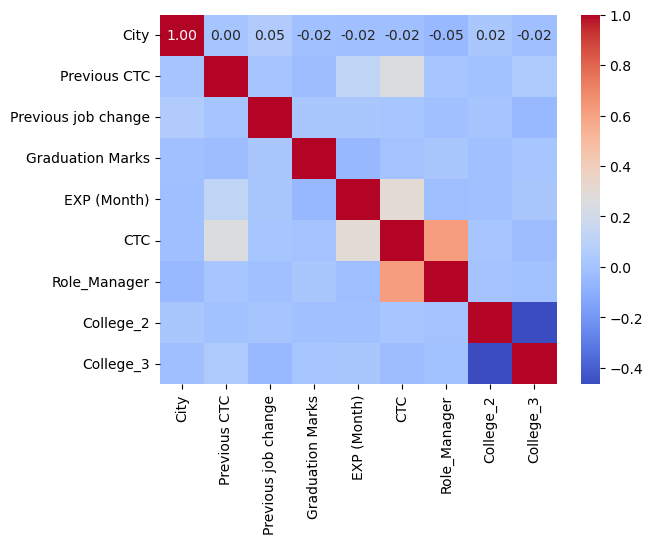

In [14]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

#### Conclusion from above heat-map
The college_2 and college_3 data is highly correleated it could be the reasong of multicollinearity

### 2. Variance Inflation Factor (VIF)
* VIF = 1: No multicollinearity.
* 1 < VIF < 5: Moderate multicollinearity.
* VIF > 5: High multicollinearity.
* VIF > 10: Considered severe multicollinearity and warrants corrective actions.

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming 'df' is your DataFrame with predictors
X = add_constant(df.loc[:,df.columns !='CTC'])  # Adding constant term to the predictors
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

               Feature         VIF
0                const  100.104510
1                 City    1.006797
2         Previous CTC    1.017327
3  Previous job change    1.007075
4     Graduation Marks    1.005515
5          EXP (Month)    1.019719
6         Role_Manager    1.004167
7            College_2    1.278480
8            College_3    1.283929


#### Conclusion from above VIF
All values lies between 1<VIF<5, so we have moderate level of multicollinearity

<h2><span style="color: #00ced1;"> Charts Plotting to check Releation type</span> </h2>

### Joint plot

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


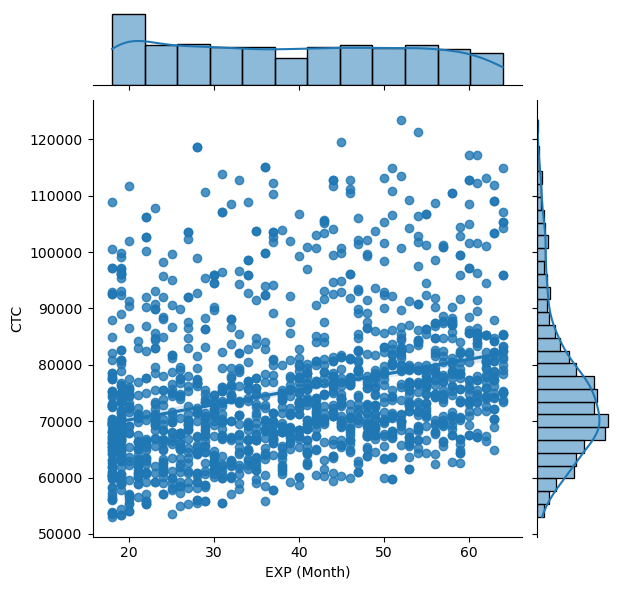

In [16]:
sns.jointplot(x='EXP (Month)',y='CTC',data=df,kind='reg')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


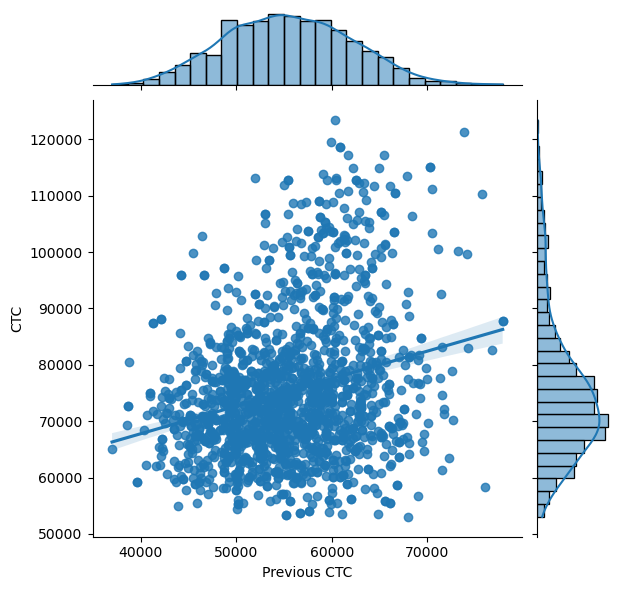

In [17]:
sns.jointplot(x='Previous CTC',y='CTC',data=df,kind='reg')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


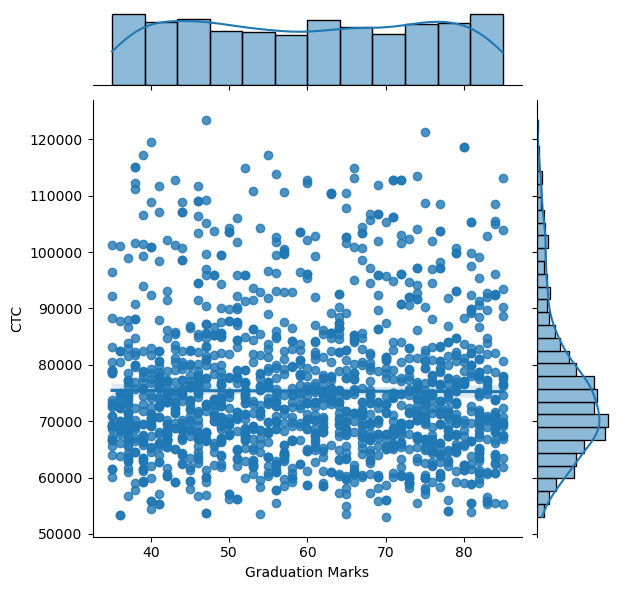

In [18]:
sns.jointplot(x='Graduation Marks',y='CTC',data=df, kind='reg')

### Conclusion
* Exp(Month) and CTC has slightly Linear Relationship
* Previous(CTC) and CTC also has Linear Relationship 
* Graduation Marks and CTC has No Relationship

### ---------------------------------------------------------------

<h2><span style="color: #00ced1;">Let's DO Modelling To find best fit model to predict Salary for our dataset</span> </h2>

####    #Splitting Data into independent variable(X) and dependent variable(y)

In [19]:
X=df.loc[:,df.columns !='CTC']
y=df['CTC']

In [20]:
X.head(6),X.shape

(   City  Previous CTC  Previous job change  Graduation Marks  EXP (Month)  \
 0     0         55523                    3                66           19   
 1     0         57081                    1                84           18   
 2     0         60347                    2                52           28   
 3     0         49010                    2                81           33   
 4     0         57879                    4                74           32   
 5     0         54340                    4                73           31   
 
    Role_Manager  College_2  College_3  
 0             1          1          0  
 1             0          1          0  
 2             0          0          1  
 3             0          0          1  
 4             0          0          0  
 5             0          1          0  ,
 (1589, 8))

In [21]:
y.head(6),y.shape

(0    71406
 1    68005
 2    76764
 3    82092
 4    73878
 5    59950
 Name: CTC, dtype: int32,
 (1589,))

#### #Train-Test-Split

In [22]:
# importing necessary libraries
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state =1)

In [24]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1271, 8), (318, 8), (1271,), (318,))

In [25]:
# importing necessary libraries
from sklearn.linear_model import LinearRegression

In [26]:
# Creating Linear Regression object to fit the train data
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
lr.score(X_train,y_train)

0.5324722171782253

In [28]:
y_lr_pred=lr.predict(X_test)

In [29]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2=r2_score(y_test,y_lr_pred)
mse = mean_squared_error(y_test, y_lr_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 60944255.485816956
R-squared: 0.5396858296304479


In [30]:
print(lr.intercept_,lr.coef_)

35612.24013718195 [ 5.15361979e+02  4.41022920e-01  8.60879695e+01  1.50165431e+01
  2.65543189e+02  1.95509837e+04 -2.36900240e+02 -1.49296388e+03]


#### From above data we can see the mean squared value is very high 
#### Some of the reason of high mse could be the 
* Underfitting
* Outliers
* Nonlinear Relationship
* Incorrect Assumptions
* Multicollinearity
* Insufficient Data
* Feature Scaling
#### I found the multicollinearity in plotting heatmap also,let's give a thought to it and Let's perform other model which avoid multicollinearity

### ---------------------------------------------------------------

<h2><span style="color: #00008b;">1. REGULARIZATIONS TECHNIQUES</span> </h2>

#### RIDGE REGRESSION
#### LASSO REGRESSION
#### ELASTIC NET REGRESSION
##### Will do the Ridge regression from above

<h3><span style="color: #b8860b;">RIDGE REGRESSION</span> </h3>

#### Standarizing the data

In [31]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
# Assuming X_train, X_test, y_train, y_test are your training and test datasets

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Instantiate and fit the Ridge regression model on the standardized data
ridge_model = Ridge(alpha=1.0)  # You can specify the value of alpha
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [33]:
ridge_r2=r2_score(y_test,ridge_model.predict(X_test_scaled))
ridge_mse = mean_squared_error(y_test,ridge_model.predict(X_test_scaled))
print("Mean Squared Error:", ridge_mse)
print("R-squared:", ridge_r2)

Mean Squared Error: 60934106.807872266
R-squared: 0.539762482962763


#### Validation curve to find the value of alpha where r2_Score is maximum in ridge

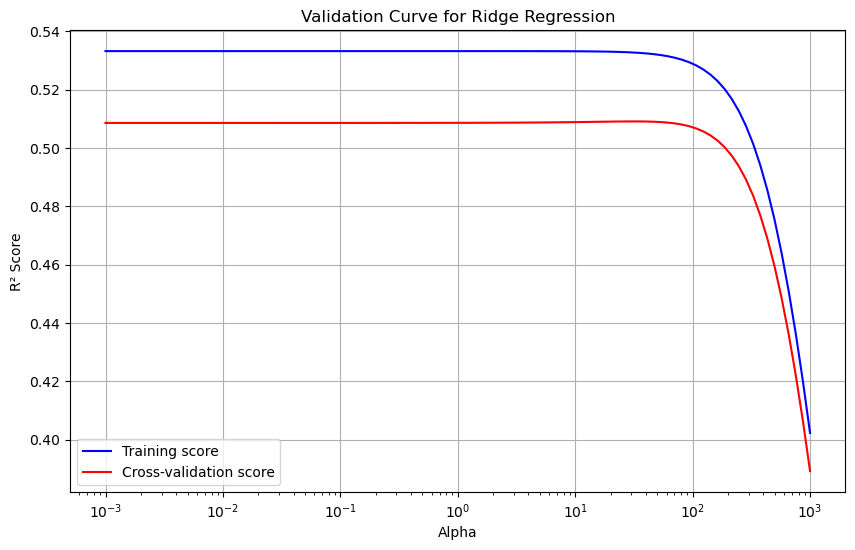

Best Alpha: 30.538555088334185


In [34]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
# Define the range of alpha values to test
alphas = np.logspace(-3, 3, 100)  # Adjust the range as needed
# Calculate validation curve
train_scores, valid_scores = validation_curve(ridge_model, X_train_scaled, y_train,
                                              param_name="alpha",
                                              param_range=alphas,
                                              scoring="r2",
                                              cv=5)

# Calculate mean R² scores across folds
mean_train_scores = np.mean(train_scores, axis=1)
mean_valid_scores = np.mean(valid_scores, axis=1)

# Plot validation curve
plt.figure(figsize=(10, 6))
plt.plot(alphas, mean_train_scores, label="Training score", color="blue")
plt.plot(alphas, mean_valid_scores, label="Cross-validation score", color="red")
plt.xlabel("Alpha")
plt.ylabel("R² Score")
plt.title("Validation Curve for Ridge Regression")
plt.xscale("log")
plt.legend()
plt.grid(True)
plt.show()

# Find the value of alpha with maximum cross-validation score
best_alpha = alphas[np.argmax(mean_valid_scores)]
print("Best Alpha:", best_alpha)


In [35]:
#Model Fitting
ridge_model = Ridge(alpha=30.538555088334185)  # You can specify the value of alpha
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=30.538555088334185)

In [36]:
#Evaluation
ridge_r2=r2_score(y_test,ridge_model.predict(X_test_scaled))
ridge_mse = mean_squared_error(y_test,ridge_model.predict(X_test_scaled))
ridge_rmse=ridge_mse*0.5

print("RIDGE MODEL:")
print(f"R-squared: {ridge_r2}")
print(f"Mean Squared Error: {ridge_mse}", )
print(f'Root Mean Squared Error: {ridge_rmse}')


RIDGE MODEL:
R-squared: 0.5416241339921091
Mean Squared Error: 60687629.633670114
Root Mean Squared Error: 30343814.816835057


<h2><span style="color: #00008b;">2. ENSEMBLE METHODS:</span> </h2>
Ensemble learning methods can also help mitigate the effects of multicollinearity.
#### RANDOM FOREST
* Advantages: Handles multicollinearity well, performs variable selection, and provides feature importance.
* Disadvantages: More complex and harder to interpret than linear models.
* Implementation: RandomForestRegressor in scikit-learn.

<h3><span style="color: #b8860b;">RANDOM FOREST</span> </h3>

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Initializing and training the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
r2=r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5


print("RANDOM FOREST:")
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}", )
print(f'Root Mean Squared Error: {rmse}')

RANDOM FOREST:
R-squared: 0.6438438338499086
Mean Squared Error: 47154039.08872579
Root Mean Squared Error: 6866.879865610421


### --------------------------------------------------------------

# Q.1- Your views about the problem statement?

As TechWorks is a consulting company who provides top-notch  IT talent to variety of business, to improvising the Machine Learning model to predict the accurate salary will help them in providing better service to other companies. Improvising ML model leads to :
* Improving Recruitment process : By predicting the salary of newly hired employees which will lead to better recruitment outcomes.* 
Fairness and Transparency : It helps in mitigating biases and ensures that compensation decisions are based on objective criteri.
* 
Scalability and Efficiency: Once developed, a machine learning model for salary prediction can be applied to a large number of job openings and candidates, making the recruitment process more scalable and efficien
* Market Competitiveness
*  Cost Optimization
*   Higher Employee Satisfaction and Retentiont
### ---------------------------------------------------------------------------
Developing and enhancing an ML model for salary prediction can significantly transform the recruitment and compensation landscape for TechWorks Consulting and its clients. By leveraging data-driven insights, companies can achieve better recruitment outcomes, ensure fairness and transparency in compensation, optimize costs, and improve overall HR efficiency. This strategic investment in technology not only enhances current practices but also positions companies to be more competitive and responsive to future market dynamics..


# Q.2- What will be your approach to solving this task?

Approach to Create a Machine Learning Model for Salary Prediction
1. Data Collection : Gather historical data on employee salaries along with relevant features that might influence salary levels.
2. Data Preprocessing: Cleaning the Data >> Feature Engineering >> Encoding >> Normalization.
3. Feature Selection : Feature selection is the process of selecting a subset of relevant and significant features (variables) from the original dataset to be used as inputs to a machine learning model. The goal is to improve the model’s performance by eliminating redundant or irrelevant features, thereby enhancing the model’s accuracy, efficiency, and interpretability.
4. Model Selection : Choosing suitable regression model according to the type of data and others matrices in our data.For eg: there was multicollinearity in our data and best method for our data could be REGULARIZATIONS TECHNIQUES and ENSEMBLE METHODS as both are unaffected by this
5. Model Evaluation: Evaluate model performance on the testing set using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²). Ensure the model is not overfitting or underfitting.

# Q.3- What were the available ML model options you had to perform this task?

As in our data is continous and we have moderate level of multicollinearity in our data and for that we have four different methods and from them I chose two methods that is below:
1. Regularization Techniques : Regularization methods add a penalty to the regression model to reduce the complexity and prevent overfitting. They are particularly effective in dealing with multicollinearity.We have Ridge,Lasso and Elastic Net Regression from them I chose Ridge.
2.  Ensemble Methods:Ensemble learning methods can also help mitigate the effects of multicollinearity.We have Random Forest.Random Forests are robust to multicollinearity because they are based on bagging, which reduces overfitting by averaging predictions from different trees that may not include all correlated features.
   
NOTE: Random Forests offer robustness and flexibility in handling complex datasets with multicollinearity.

# Q.4- . Which model’s performance is best and what could be the possible reason for that?

From above model we can see RANDOM FOREST MODEL performing the best.
The possible reason for that can be:
1. Random Forest is good in model Complexity and flexibity.
2. Handling High Dimensional Data :  Random Forests are generally robust to multicollinearity because they aggregate results from multiple trees, which reduces the impact of correlated features on the overall prediction.
3.  Variance and Bias Trade-off: Random forest has low variance and moderate bias where as Ridge regression has High bias and low variance.
4. Random forest is better in Noise handling than Ridge regression.

# Q.5- What steps can you take to improve this selected model’s performance even further?

To improve this selected model's performance further:
1. Increase Data: More data can improve model performance because it provides the model with more examples to learn from
2. Feature Engineering: Removing reduntant or irrelevant ones and retain with most relevant features.
3. Addressing Overfitting and Underfitting
4. Hyperparameters Tuning: Use technique like GridSearchCV and other method find the best parameters for your model.